### Library

In [1]:
from datetime import datetime, timedelta
import oandapy
import pandas as pd
import time
import matplotlib.pyplot as plt
import mpl_finance as mpf
from matplotlib.dates import date2num
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import hdbscan
from config import token

### Oandaのインスタンス化

In [2]:
access_token = token
oanda = oandapy.API(environment="practice", access_token=access_token)

### 過去データの取得

In [3]:
#取得したい日付
end = datetime(2018, 8, 1, 0, 0)
start = end - timedelta(days = 4999)

end_day =  '{0}-{1:02d}-{2:02d}-{3:02d}:{4:02d}:{5:02d}'.format(end.year, end.month, end.day, end.hour, end.minute, end.second)
start_day =  '{0}-{1:02d}-{2:02d}-{3:02d}:{4:02d}:{5:02d}'.format(start.year, start.month, start.day, start.hour, start.minute, start.second)

res = oanda.get_history(instrument="USD_JPY",granularity="D",start = start_day, end = end_day)

In [5]:
df = pd.DataFrame(res['candles'])
df = df.drop(['complete'], axis = 1)

df['time'] = df['time'].str[:-8]
df['time'] = df['time'].str.replace('T',' ')
times = [datetime.strptime(v, '%Y-%m-%d %H:%M:%S') for v in df['time']]
df['time'] = times
df = df.set_index('time',drop = True)

In [83]:
price = df.drop('volume', axis = 1)

prices = []
for i in range(20):
    prices.append(price.iloc[4+i:price.shape[0]-20+i,0:1])

In [112]:
arr = np.array(prices[0]).reshape(-1,20)
for i in range(19):
    arr_adder = np.array(prices[i+1]).reshape(-1,20)
    arr = np.concatenate((arr, arr_adder), axis = 0)

In [181]:
arr_copy = arr
arr_std = (arr_copy - arr_copy.mean()) / arr_copy.std()

### PCA

In [183]:
pca = PCA(n_components=2).fit_transform(arr_std)

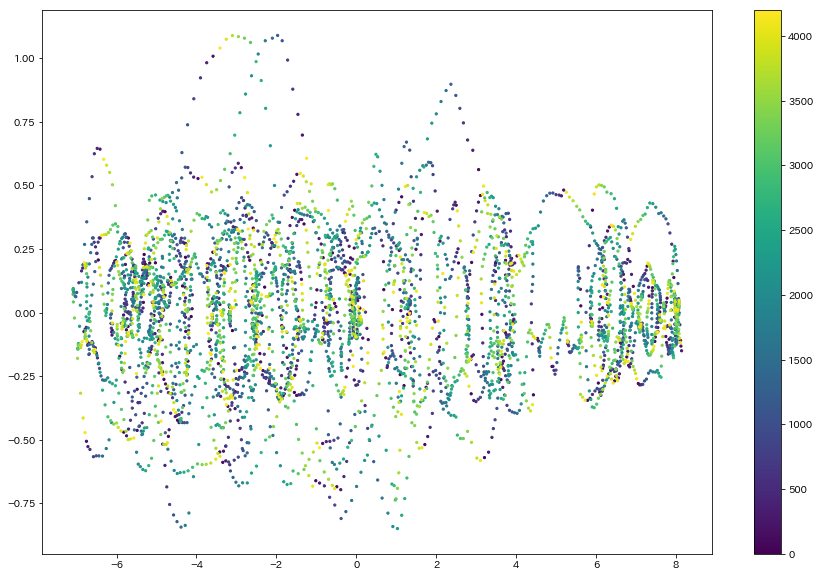

In [215]:
plt.figure(figsize=(15,10))
plt.scatter(pca[:, 0], pca[:, 1], s=5, c=range(pca.shape[0]))
plt.colorbar()
plt.show()

### TSNE

In [185]:
tsne = TSNE(n_components=2).fit_transform(arr_std)

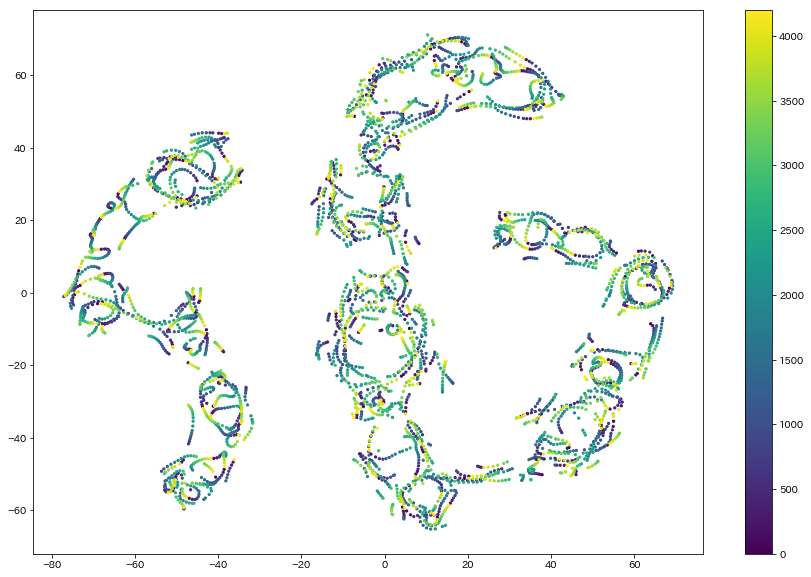

In [214]:
plt.figure(figsize=(15,10))
plt.scatter(tsne[:, 0], tsne[:, 1], s=5, c=range(tsne.shape[0]))
plt.colorbar()
plt.show()

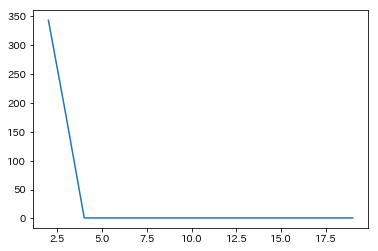

In [187]:
cl=[]
size=range(2,20)
for i in size:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=i, gen_min_span_tree=True)
    clusterer.fit(tsne)
    cl.append(clusterer.labels_.max())
plt.plot(size,cl)
plt.show()

the number of cluster=176


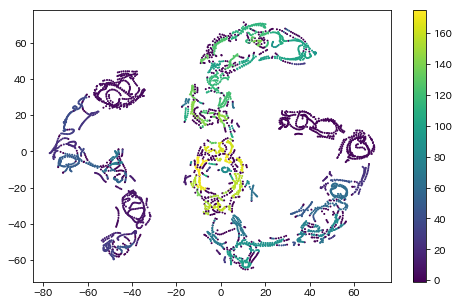

In [206]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(tsne)
cls=clusterer.labels_
cls_num=cls.max()-cls.min()
print('the number of cluster={}'.format(cls_num))

plt.figure(figsize=(8,5))
plt.scatter(tsne[:, 0], tsne[:, 1],s=1,c=cls)
plt.colorbar()
plt.show()

In [207]:
cls=cls.reshape(-1,1)
arr1=np.concatenate((arr,cls),axis=1)
col=list(np.arange(20))
col.append('cluster')
df1=pd.DataFrame(dict(zip(col,arr1.T)))

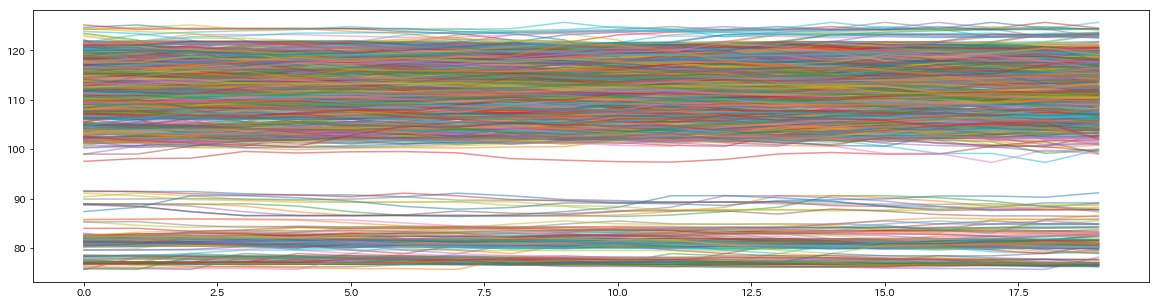

In [208]:
clm = df1[df1['cluster'] == -1.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(clm.T, alpha = 0.5)
plt.show()

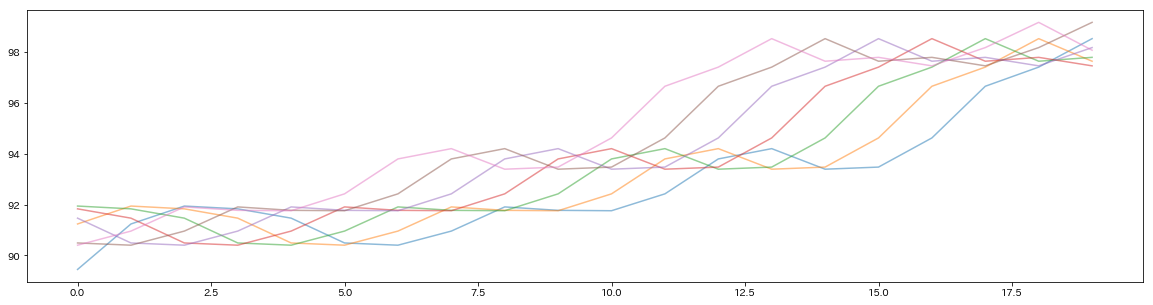

In [209]:
cl0 = df1[df1['cluster'] == 0.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(cl0.T, alpha = 0.5)
plt.show()

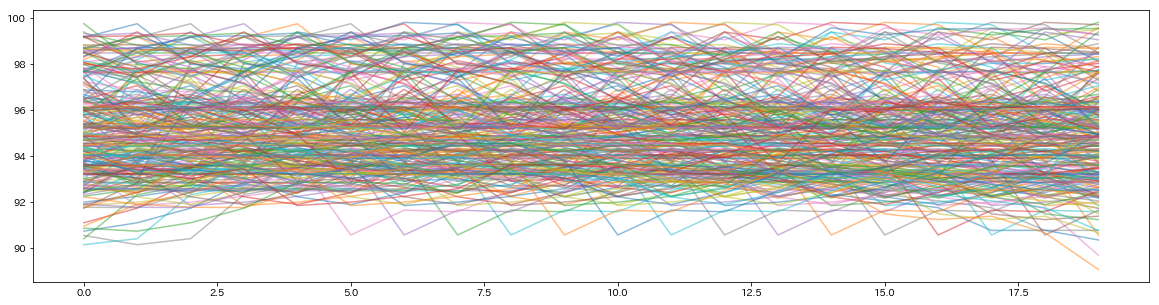

In [210]:
cl1 = df1[df1['cluster'] == 1.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(cl1.T, alpha = 0.5)
plt.show()

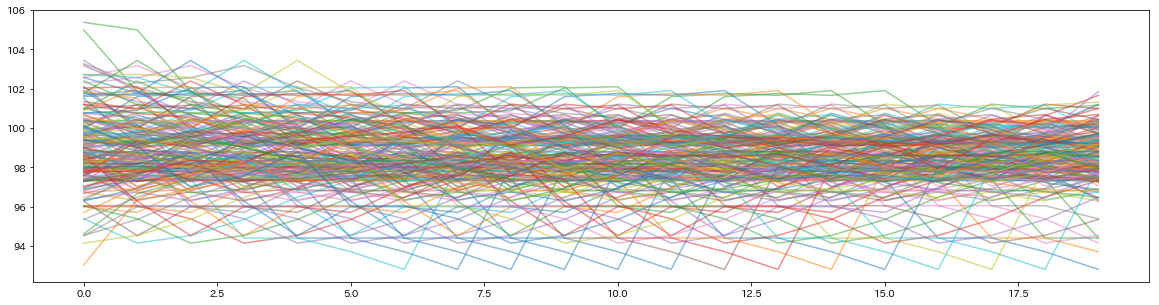

In [211]:
cl2 = df1[df1['cluster'] == 2.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(cl2.T, alpha = 0.5)
plt.show()

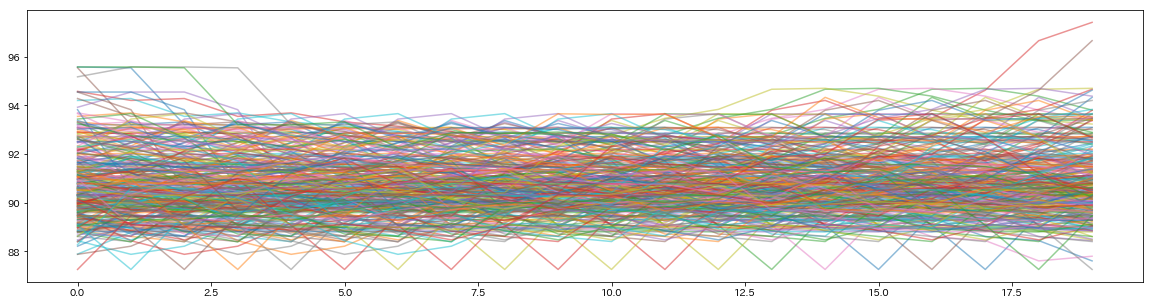

In [212]:
cl3 = df1[df1['cluster'] == 3.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(cl3.T, alpha = 0.5)
plt.show()

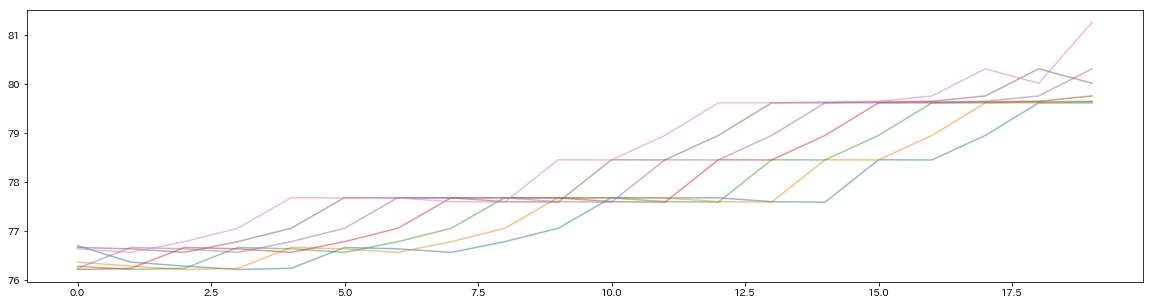

In [213]:
cl4 = df1[df1['cluster'] == 4.0].drop('cluster',axis = 1)
plt.figure(figsize = (20,5))
plt.plot(cl4.T, alpha = 0.5)
plt.show()